# Topic: Marketing techniques using Customer Segmentation

# Roll No.: 21bce171
#                 21bce172
#                 21bce192
#                 21bce193

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Load the data from the CSV file
data = pd.read_csv('Womens.csv')

# Select the relevant features (X)
X = data[['Age', 'Rating', 'Positive Feedback Count']]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Create a transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Age', 'Rating', 'Positive Feedback Count'])
    ])

# Apply the preprocessing to both training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Add a customer segmentation step (K-Means clustering)
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_train = kmeans.fit_predict(X_train)  # Get cluster labels for training data
cluster_labels_test = kmeans.predict(X_test)  # Get cluster labels for testing data

# Add cluster labels to the training and testing data
X_train = pd.DataFrame(X_train, columns=['Age', 'Rating', 'Positive Feedback Count'])
X_train['Cluster'] = cluster_labels_train
X_test = pd.DataFrame(X_test, columns=['Age', 'Rating', 'Positive Feedback Count'])
X_test['Cluster'] = cluster_labels_test

# # Print the first few rows of the DataFrames with cluster labels
# print(X_train.head())
# print(X_test.head())

# Define marketing labels for each cluster
marketing_labels ={
    0: 'Youthful Appeal Campaign',
    1: 'Elegance Emphasis Strategy',
    2: 'Senior Customer Engagement',
    3: 'Smart Shopper Incentives',
    4: 'Mid-Age Fashion Focus',
    5: 'Age-Inclusive Marketing',
    6: 'Mature Fashion Appeal',
    7: 'Casual Chic Collection',
    8: 'Teen Trendsetter Showcase',
    9: 'Uncompromising Quality Assurance'
}

# Apply the mapping to your data
X_train['Marketing Label'] = X_train['Cluster'].map(marketing_labels)
X_test['Marketing Label'] = X_test['Cluster'].map(marketing_labels)

# Print the first few rows of the DataFrames with marketing labels
print(X_train.head())
print(X_test.head())

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        Age    Rating  Positive Feedback Count  Cluster        Marketing Label
0 -0.991912  0.720737                 -0.44412        4  Mid-Age Fashion Focus
1 -0.828835  0.720737                 -0.44412        4  Mid-Age Fashion Focus
2 -0.991912  0.720737                 -0.44412        4  Mid-Age Fashion Focus
3  1.291168  0.720737                 -0.44412        6  Mature Fashion Appeal
4 -0.339604  0.720737                 -0.44412        4  Mid-Age Fashion Focus
        Age    Rating  Positive Feedback Count  Cluster  \
0 -0.747297 -0.178294                 2.852032        5   
1  1.128091 -0.178294                -0.444120        6   
2  1.046552 -0.178294                 0.076325        8   
3 -0.584219 -1.077326                 0.076325        0   
4 -1.073451  0.720737                -0.444120        4   

             Marketing Label  
0    Age-Inclusive Marketing  
1      Mature Fashion Appeal  
2  Teen Trendsetter Showcase  
3   Youthful Appeal Campaign  
4      Mid-Age F

C:\Users\evach\AppData\Local\Temp\ipykernel_21664\2760857650.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


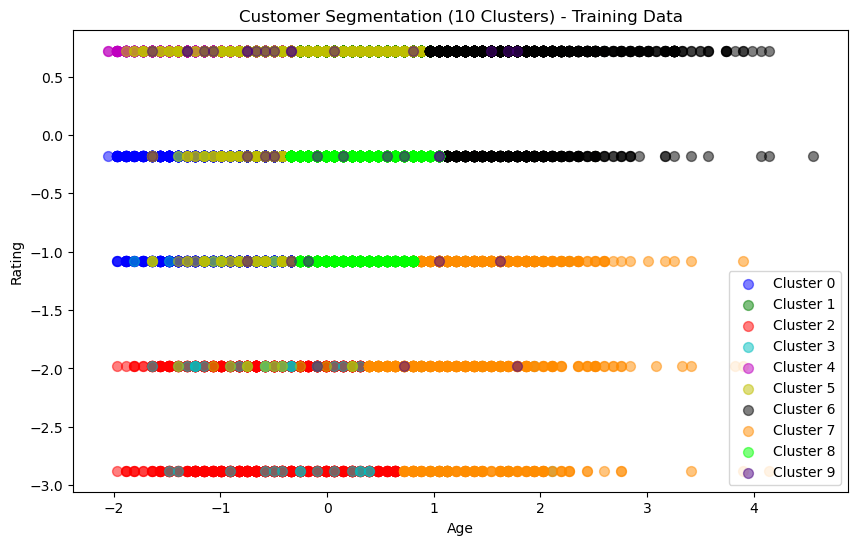

In [14]:
# Define cluster colors
cluster_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'darkorange', 'lime', 'indigo']

# Plot a scatter plot for X_train with specific cluster colors
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    plt.scatter(
        X_train[X_train['Cluster'] == cluster_label]['Age'],
        X_train[X_train['Cluster'] == cluster_label]['Rating'],
        c=cluster_colors[cluster_label],
        label=f'Cluster {cluster_label}',
        cmap='rainbow',
        alpha=0.5,
        s=50
    )

plt.title('Customer Segmentation (10 Clusters) - Training Data')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.legend()  
plt.show()

C:\Users\evach\AppData\Local\Temp\ipykernel_21664\2268199161.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


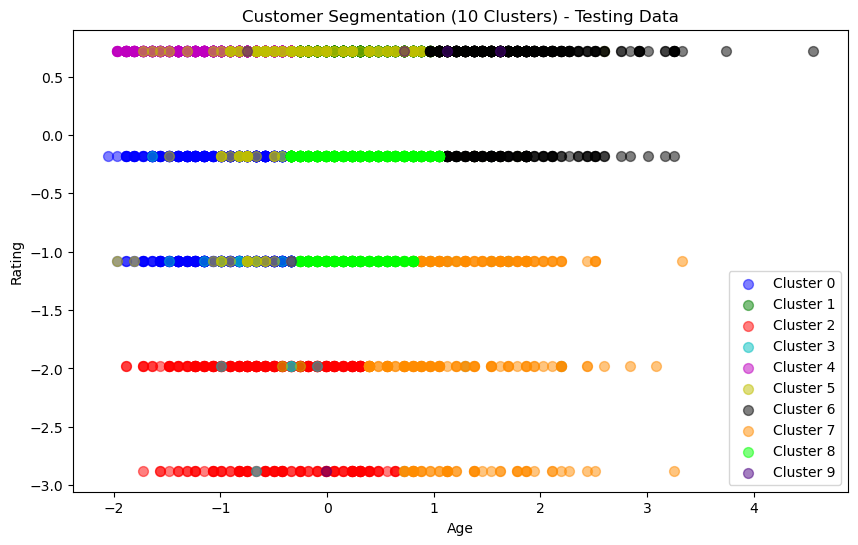

In [15]:
# Define cluster colors
cluster_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'darkorange', 'lime', 'indigo']

# Plot a scatter plot for X_test with specific cluster colors
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    plt.scatter(
        X_test[X_test['Cluster'] == cluster_label]['Age'],
        X_test[X_test['Cluster'] == cluster_label]['Rating'],
        c=cluster_colors[cluster_label],
        label=f'Cluster {cluster_label}',
        cmap='rainbow',
        alpha=0.5,
        s=50
    )

plt.title('Customer Segmentation (10 Clusters) - Testing Data')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.legend()  
plt.show()


In [16]:
# Count the number of data points in each cluster
cluster_counts = X_train['Cluster'].value_counts()

# Display the cluster distribution
print(cluster_counts)


4    4406
1    3431
6    2495
0    2490
8    2401
2    1343
5    1025
7     902
3     260
9      35
Name: Cluster, dtype: int64


In [17]:
cluster_centers = kmeans.cluster_centers_

# Display the cluster centers
print("Cluster Centers:")
print(cluster_centers)


Cluster Centers:
[[-9.15514963e-01 -5.44405779e-01 -2.19917311e-01]
 [ 2.88695103e-01  7.20737249e-01 -2.45826202e-01]
 [-5.19195037e-01 -2.31307545e+00 -1.91348433e-02]
 [ 8.84737818e-02 -4.13425481e-01  4.76299938e+00]
 [-8.78413467e-01  7.20737249e-01 -2.55124716e-01]
 [ 4.96335772e-02  2.26927789e-01  1.75833588e+00]
 [ 1.62669622e+00  5.27077392e-01 -1.41873927e-01]
 [ 1.33473939e+00 -1.76405805e+00 -1.06078786e-02]
 [ 2.25936411e-01 -4.32164784e-01 -2.34366587e-01]
 [-2.27681328e-02 -2.41745092e-02  1.22299556e+01]]


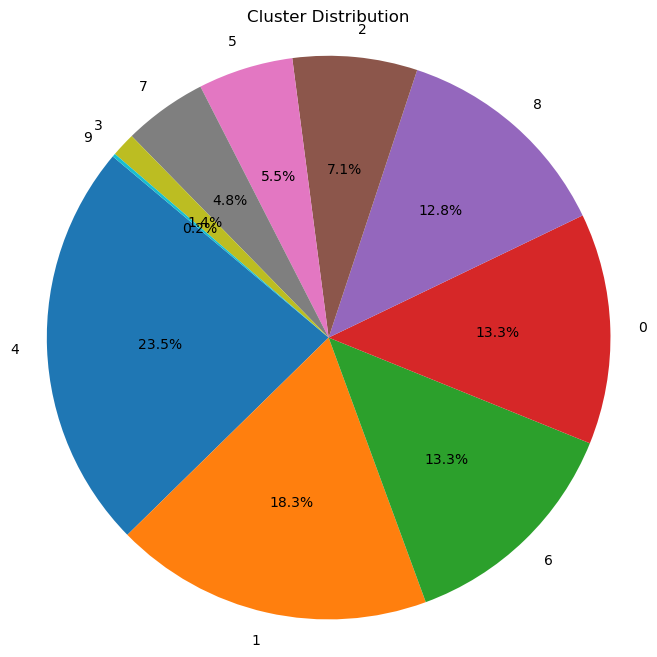

In [18]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

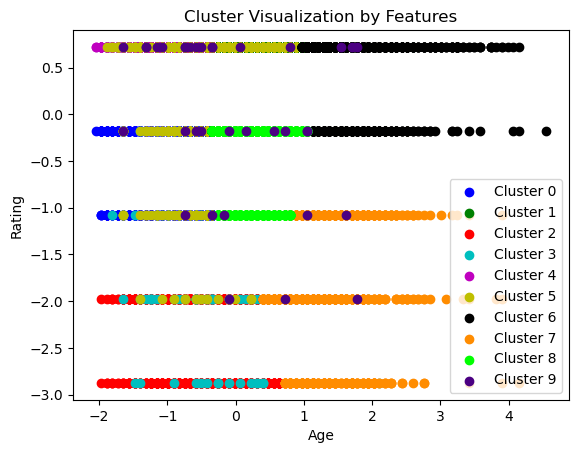

In [19]:
# Feature Visualization
import matplotlib.pyplot as plt

feature1 = 'Age'
feature2 = 'Rating'
cluster_column = 'Cluster'

for cluster in range(n_clusters):
    cluster_data = X_train[X_train[cluster_column] == cluster]
    plt.scatter(
        cluster_data[feature1],
        cluster_data[feature2],
        c=cluster_colors[cluster],  # Use specific cluster colors
        label=f'Cluster {cluster}'
    )

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.title('Cluster Visualization by Features')
plt.show()


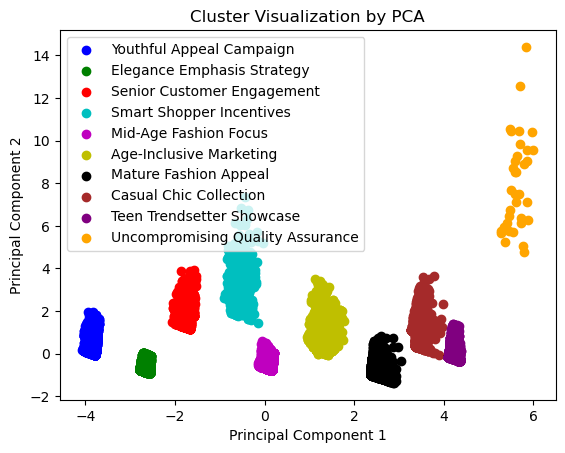

In [20]:
from sklearn.decomposition import PCA

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
# Remove the 'Marketing Label' column from X_train
X_train = X_train.drop('Marketing Label', axis=1)
reduced_data = pca.fit_transform(X_train)

# Define cluster_column and cluster_colors
cluster_column = 'Cluster'
cluster_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'brown', 'purple', 'orange']

# Plot the clusters in 2D space
for cluster in range(n_clusters):
    cluster_data = reduced_data[X_train[cluster_column] == cluster]
    plt.scatter(
        cluster_data[:, 0],
        cluster_data[:, 1],
        c=cluster_colors[cluster],
        label=f'{marketing_labels[cluster]}'
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Cluster Visualization by PCA')
plt.show()


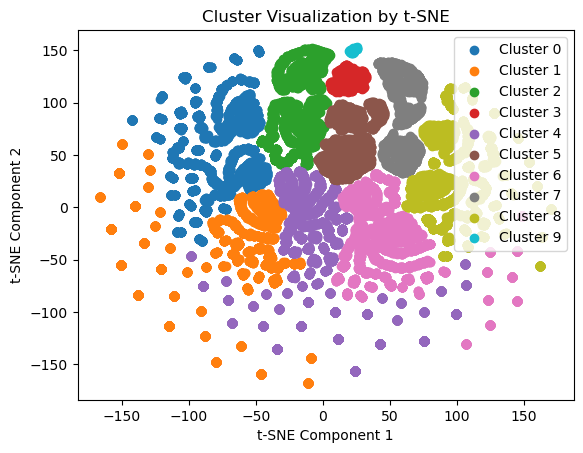

In [21]:
#t-Distributed Stochastic Neighbor Embedding (t-SNE)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
embedded_data = tsne.fit_transform(X_train)

for cluster in range(n_clusters):
    cluster_data = embedded_data[X_train[cluster_column] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.title('Cluster Visualization by t-SNE')
plt.show()


Silhouette Score: 0.6408717317854278


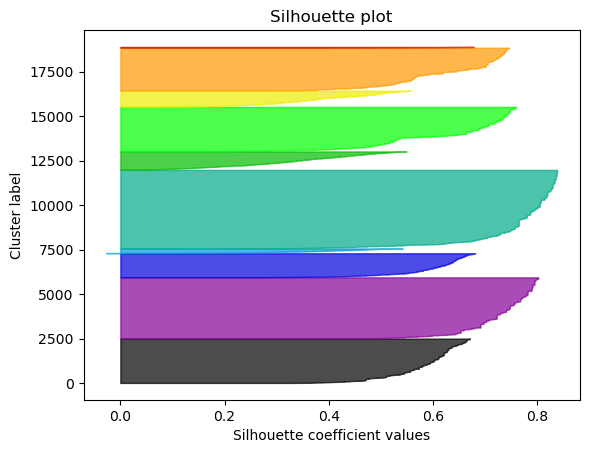

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

silhouette_avg = silhouette_score(X_train, X_train['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

sample_silhouette_values = silhouette_samples(X_train, X_train['Cluster'])

y_lower = 10
for cluster in range(n_clusters):
    cluster_silhouette_values = sample_silhouette_values[X_train['Cluster'] == cluster]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(cluster) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

plt.title("Silhouette plot")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()


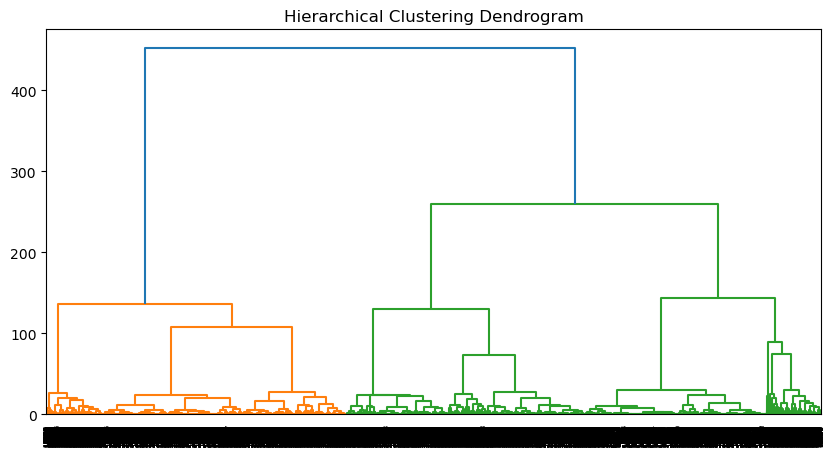

In [23]:
#Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_train, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


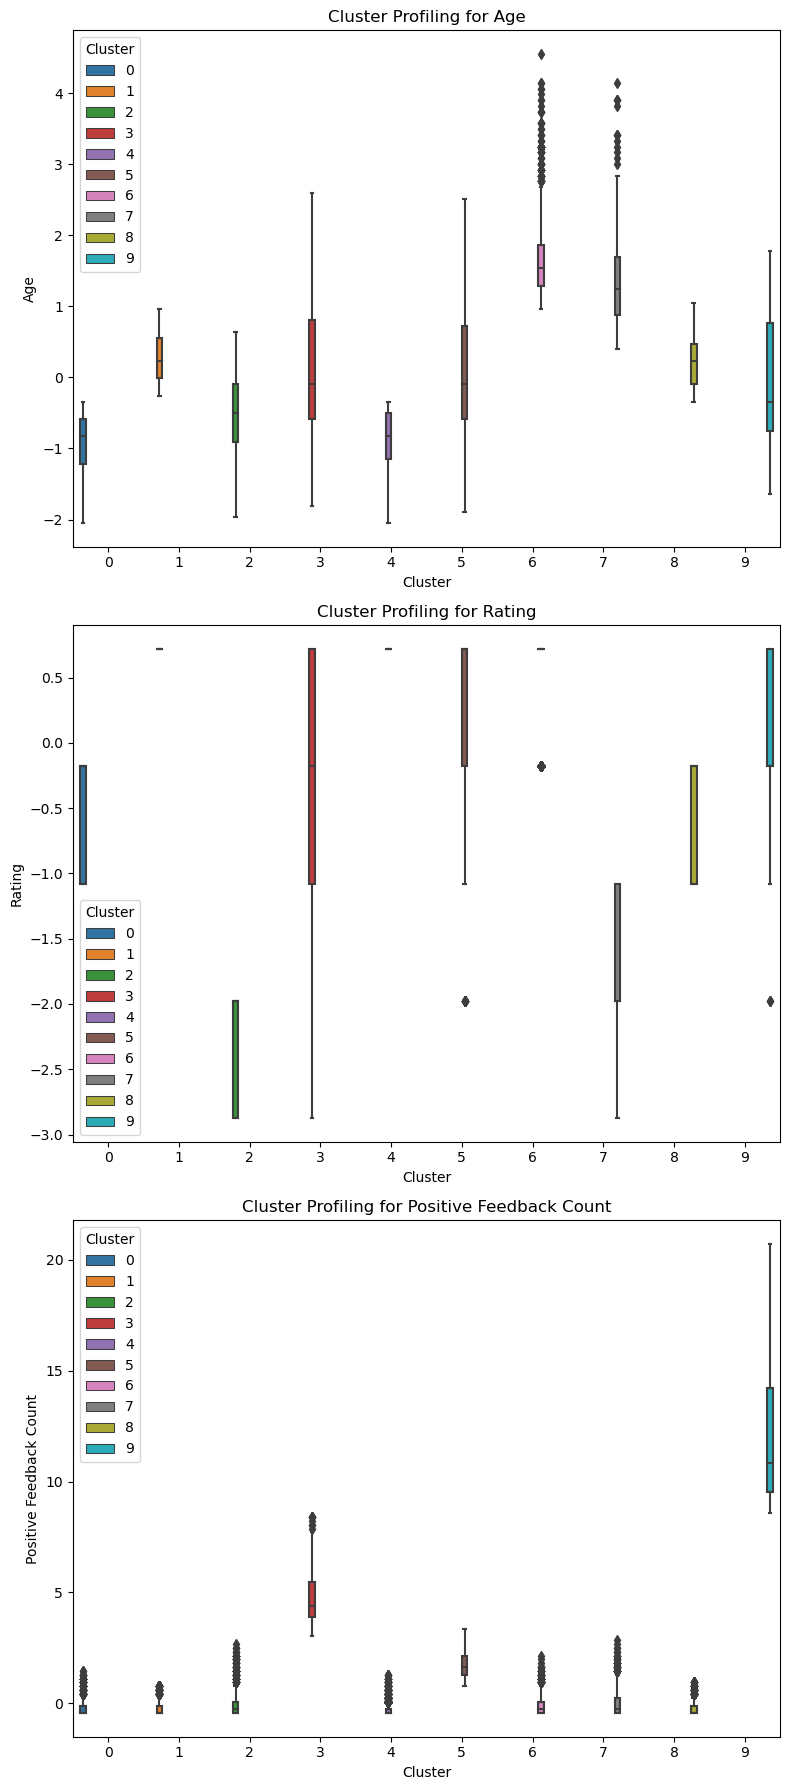

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to visualize
features_to_visualize = ['Age', 'Rating', 'Positive Feedback Count']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(features_to_visualize), ncols=1, figsize=(8, 6 * len(features_to_visualize)))

for i, feature_to_visualize in enumerate(features_to_visualize):
    sns.boxplot(x=X_train[cluster_column], y=X_train[feature_to_visualize], hue=X_train[cluster_column], ax=axes[i])
    axes[i].set_xlabel(cluster_column)
    axes[i].set_ylabel(feature_to_visualize)
    axes[i].set_title(f'Cluster Profiling for {feature_to_visualize}')

plt.tight_layout()
plt.show()
